# Goal of this project is to predict Manufacturer Suggested Retail Price(MSRP) of a car.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data

df = pd.read_csv("C:\\Users\\emman\\Desktop\\ML-Zoomcamp  projects\\car price prediction data.csv")

In [3]:
# open the first 5 rows

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# change the columns texts to lower cases and put an hyphen between spaced texts

df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#Get the object data types of dataframe df that we are interested in

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
df.dtypes[df.dtypes == 'object']          # this is a Series dataset with indes and values(data).

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [9]:
# convert objects index into a python list with variable strings.

strings = list(df.dtypes[df.dtypes == 'object'].index)

In [10]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
# change the elements of each index above into a lower case and replace spaces with hyphen

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [12]:
# confirm the changes made with the first 5 rows of the dataset

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3-Exploratory Data Analysis

In [13]:
# complete information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [14]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [15]:
# get the different types columns make.

df['make'].unique(), df['make'].nunique()

(array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
        'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
        'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
        'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
        'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
        'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
        'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
        'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
        'bugatti'], dtype=object),
 48)

In [16]:
# get types and unique values of each columns

for col in df.columns:
    print(col)
    print('\n')
    print(df[col].unique())
    print('\n')
    print(df[col].nunique())
    print()

make


['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']


48

model


['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scagl

<AxesSubplot:xlabel='msrp', ylabel='Count'>

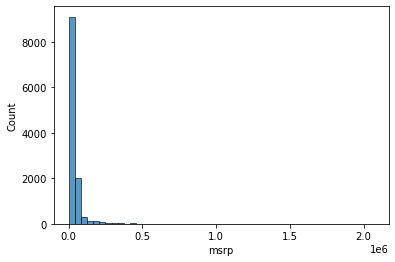

In [17]:
# PLot the msrp column and set bins(how many bars the plot should have)
# Graph below shows most cars are cheaper to buy. This distribution is called long-tail distribution.

sns.histplot(df['msrp'], bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

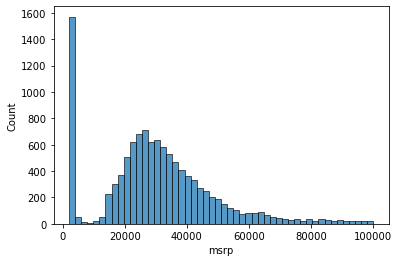

In [18]:
# Graph of prices less than 100k

sns.histplot(df['msrp'][df['msrp']<100000], bins=50)

#Our plots above will not be useful for our price prediction because it's not uniformly distributed. Adjust price using numpy logarithms

In [19]:
# Using numpy logarithms

np.log1p([0,1,1000,10000])

array([0.        , 0.69314718, 6.90875478, 9.21044037])

In [20]:
price_logs = np.log1p(df['msrp'])

In [21]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

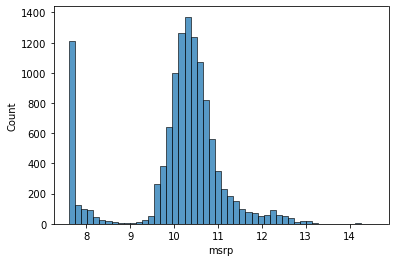

In [22]:
# Plot new price that will be accepted by the model: normal or uniformly distributed

sns.histplot(price_logs, bins=50)

In [23]:
# to get msiing values from the dataset

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4-Setting up Validation Framework

#We split the data into training set (60% of data), validation set (20% of data) and test set (20% of data)

In [24]:
# get the length of datafram df,set to variable n,get the 20% validation,20% test and 60% train data. int to remove decimal.

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [25]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [26]:
df.iloc[[100, 1, 500, 4000]]          # loc can also be used

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
100,nissan,240sx,1997,regular_unleaded,155.0,4.0,manual,rear_wheel_drive,2.0,performance,compact,coupe,26,19,2009,4107
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
500,toyota,4runner,2016,regular_unleaded,270.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,22,17,2031,42325
4000,gmc,envoy_xl,2006,regular_unleaded,300.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,19,14,549,35350


In [138]:
# individual data of the different set above

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [139]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [140]:
len(df.iloc[:n_train]), len(df.iloc[n_train:n_train+n_val]), len(df.iloc[n_train+n_val:])      # same as above

(7150, 2382, 2382)

#The below samples is not part of the class

In [141]:
# to shuffle the dataset of the training data 

np.random.seed(2)
df_train.sample(7150)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3901,honda,element,2010,regular_unleaded,166.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,24,19,2202,23885
37,mercedes-benz,190-class,1992,regular_unleaded,158.0,6.0,manual,rear_wheel_drive,4.0,luxury,compact,sedan,25,17,617,2000
4132,cadillac,escalade_ext,2012,flex-fuel_(premium_unleaded_recommended/e85),403.0,8.0,automatic,all_wheel_drive,4.0,"crossover,flex_fuel,luxury,performance",large,crew_cab_pickup,18,13,1624,69640
5280,rolls-royce,ghost,2012,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,20,13,86,290000
6822,infiniti,m,2013,premium_unleaded_(required),330.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,26,18,190,48700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,subaru,loyale,1992,regular_unleaded,90.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,29,22,640,2000
3606,cadillac,dts,2011,premium_unleaded_(recommended),292.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624,59875
5704,hummer,h3t,2010,flex-fuel_(unleaded/e85),300.0,8.0,automatic,four_wheel_drive,4.0,"crossover,flex_fuel,luxury",compact,crew_cab_pickup,16,13,130,39205
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100


In [142]:
# to shuffle the dataset of the validation data 

np.random.seed(2)
df_val.sample(2382)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7701,toyota,prius,2016,regular_unleaded,121.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,53,58,2031,24700
7707,toyota,prius,2017,regular_unleaded,121.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,50,54,2031,24685
7750,audi,q3,2015,premium_unleaded_(recommended),200.0,4.0,automatic,front_wheel_drive,4.0,"crossover,luxury",compact,4dr_suv,29,20,3105,32500
8851,audi,s3,2016,premium_unleaded_(required),292.0,4.0,automated_manual,all_wheel_drive,4.0,"factory_tuner,luxury,high-performance",compact,sedan,31,23,3105,42500
8880,audi,s5,2016,premium_unleaded_(required),333.0,6.0,manual,all_wheel_drive,2.0,"factory_tuner,luxury,high-performance",midsize,coupe,26,17,3105,53100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,toyota,pickup,1995,regular_unleaded,116.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,19,2031,2197
7824,audi,q5,2017,premium_unleaded_(required),272.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,26,18,3105,46400
8249,land_rover,range_rover_evoque,2015,premium_unleaded_(recommended),240.0,4.0,automatic,all_wheel_drive,2.0,"crossover,luxury",compact,2dr_suv,30,21,258,49900
9497,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,22,16,1385,43450


In [143]:
# to shuffle the dataset of the test data 

np.random.seed(2)
df_test.sample(2382)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10083,plymouth,sundance,1993,regular_unleaded,93.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,23,535,2000
10089,pontiac,sunfire,2004,regular_unleaded,140.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,23,210,10895
10132,suzuki,sx4,2012,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hatchback",compact,4dr_hatchback,29,23,481,18875
11233,hyundai,veloster,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,26,1439,18000
11262,chevrolet,venture,2004,regular_unleaded,185.0,6.0,automatic,front_wheel_drive,4.0,NaN,compact,passenger_minivan,24,17,1385,21475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,cadillac,srx,2014,regular_unleaded,308.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,23,16,1624,45375
10206,toyota,tacoma,2016,regular_unleaded,159.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,22,19,2031,28820
10631,chevrolet,trailblazer,2009,regular_unleaded,285.0,6.0,automatic,four_wheel_drive,4.0,NaN,midsize,4dr_suv,20,14,1385,31330
11879,gmc,yukon,2017,flex-fuel_(unleaded/e85),355.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,performance",large,4dr_suv,22,16,549,60315


#Back to Tutorial shuffling method

In [144]:
# use np.arange,np.random.seed(2) and np.random.shuffle on the train, val and test dataset.

idx = np.arange(n)

In [145]:
np.random.seed(2)
np.random.shuffle(idx)

In [146]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [147]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [148]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [149]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [150]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
752,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
3137,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


In [151]:
# reset the index of each dataset

df_train = df_train.reset_index(drop=True)

df_val = df_val.reset_index(drop=True)

df_test = df_test.reset_index(drop=True)

In [152]:
# get the target y for each dataset

y_train = np.log1p(df_train['msrp'].values)

y_val = np.log1p(df_val['msrp'].values)

y_test = np.log1p(df_test['msrp'].values)

In [153]:
y_train, y_val, y_test

(array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
        12.62248099, 10.54061978]),
 array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
         9.77542688, 10.1924563 ]),
 array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
        10.00789261, 10.40414162]))

In [154]:
len(y_train),len(y_val),len(y_test)    # verify if the lengths of target corresponds to length of each dataset

(7150, 2382, 2382)

In [155]:
# delete the target y from the df data:  also use df_train.drop('msrp',axis=1)

del df_train['msrp']

del df_val['msrp']

del df_test['msrp']

# 2.5-Linear Regression

In [156]:
#Linear regression formula : g(Xi) = Wo + W1.Xi1 + W2.Xi2 + W3.Xi3 ...... Wn.Xin
# W refers to the bias weight while Xi are features of a car and g is the linear regression model

# Linear regression in python code: the xi features were chosen randomly from a car. 

xi = [453,11,86]
w0 = 0

def linear_regression(xi):
    
    n = len(xi)
    
    pred = w0
    w = [0.01, 0.04, 0.002]
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [157]:
linear_regression(xi)

5.142

In [158]:
# if the weight changes, the price of the car is calculated below:

w0 = 7.17
linear_regression(xi)

12.312

In [159]:
# since the price is in logarithm, we use exponential to get the actual price: np.exp(x)-1 == np.expm1(x)

np.exp(12.312) - 1, np.expm1(12.312)

(222347.2221101062, 222347.2221101062)

In [160]:
np.log1p(222347.2221101062)  # np.log1p(x) is the logarithm while np.expm1(x) or np.exp(x)-1 is the exponential

12.312

# 2.6-Linear Regression Vector Form

#The dot product function below, is applied to the linear regression function above.

In [161]:
w = [0.01, 0.04, 0.002]
xi = [453,11,86]

In [162]:
# xi has an imaginary 1 multiplied by w0 which still give w0

w_new = [w0] + w
xi = [1] + xi

In [163]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [164]:
def linear_regression(xi):
    return w0 + dot(xi,w)

#to get prices(linear regression) using matrix-vector form: pick random features(matrix) and use dot product with vector w

In [165]:
w_new, xi

([7.17, 0.01, 0.04, 0.002], [1, 453, 11, 86])

In [166]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

In [167]:
X = np.array([x1,x2,x3])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [168]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [169]:
def linear_regression(X):
    return X.dot(w_new)

In [170]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# 2.7-Training a Linear Regression Model

#g(X) = X * w , X * w = y. g is the model, X is the feature matrix, w is the weight and y is the target. To get the weight, we use Gram matrix: w = (X(transpose) * X) to the power of -1 * X(transpose) * y. Gram matrix = X(transpose) * X

In [171]:
a = np.arange(10).reshape(5,2)

In [172]:
a, a[4,:]

(array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]),
 array([8, 9]))

In [191]:
X = [
    [148, 24, 1385],
    [132, 25, 2301],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2301],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [174]:
np.eye(3)              # identity matrix can have any number.

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#find the Gram matrix. X.T is the transpose of X and get the inverse.

In [175]:
X, X.T

(array([[ 148,   24, 1385],
        [ 132,   25, 2301],
        [ 453,   11,   86],
        [ 158,   24,  185],
        [ 172,   25,  201],
        [ 413,   11,   86],
        [  38,   54,  185],
        [ 142,   25,  431],
        [ 453,   31,   86]]),
 array([[ 148,  132,  453,  158,  172,  413,   38,  142,  453],
        [  24,   25,   11,   24,   25,   11,   54,   25,   31],
        [1385, 2301,   86,  185,  201,   86,  185,  431,   86]]))

In [176]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [177]:
XTX = X.T.dot(X)                    #Gram matrix

In [178]:
XTX_inv = np.linalg.inv(XTX)

In [179]:
w = XTX_inv.dot(X.T).dot(y)           # weight = inv(X.T.dot(X)).dot(X.T).dot(y)

In [180]:
w

array([0.2622938 , 3.07268567, 0.03418076])

#add ones to the array X with np.column stack

In [181]:
X.shape[0]

9

In [182]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [183]:
X = np.column_stack([ones, X])

In [184]:
XTX = X.T.dot(X)

In [185]:
XTX_inv = np.linalg.inv(XTX)

In [186]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.91860448e+02, -2.14453284e-01, -2.47336270e+00, -1.73046165e-02])

In [187]:
# Split the bias term w0 from w1, w2, w3.

w0 = w_full[0], 
w = w_full[1:]

In [188]:
w0, w           # NEgative indicates price reduction if a feature goes up.

((291.86044791248213,), array([-0.21445328, -2.4733627 , -0.01730462]))

In [189]:
# function of the above  solution:

def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [192]:
train_linear_regression(X,y)                     # Run the values without the ones.

(291.86044791248213, array([-0.21445328, -2.4733627 , -0.01730462]))

# 2.8-Car Price Baseline Model

#we make use of some impotant numerical columns from the trained data

In [193]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [194]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

In [195]:
df_train[base]                 # to get the values of the chosen columns

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [196]:
# extract the numpy array and get y_train

X_train = df_train[base].values

In [197]:
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [198]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [199]:
train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [200]:
#nan above shows some missing values 

df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [201]:
#fill the missing values with 0

df_train[base].fillna(value=0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [202]:
X_train = df_train[base].fillna(0).values

In [203]:
train_linear_regression(X_train,y_train)

(7.927257388070001,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [204]:
w0,w = train_linear_regression(X_train,y_train)

In [205]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

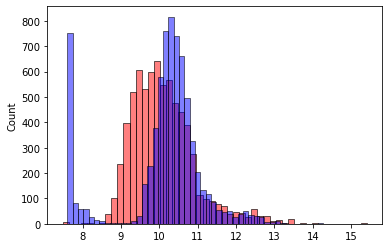

In [206]:
# Plot y_pred vs y_train to see how close the predictions was:

sns.histplot(y_pred, color='r', bins=50, alpha=0.5)
sns.histplot(y_train, color='b', bins=50, alpha=0.5)


#the plot above shows our model did not do good cos of the difference in the uniformity

# 2.9- Root Mean Square Error

In [207]:
# Formula is rmse = sqr(g(xi) - yi)mean, and sqrt of the divided mean.

def rmse(y, y_pred):
    error = y - y_pred
    squared_error = error**2
    mean_square_error = squared_error.mean()
    return np.sqrt(mean_square_error)

In [208]:
rmse(y_train,y_pred)

0.7554192603920132

# 2.10- Validating the model

#define a function to get the validation dataset. Validation data could be either the train or val data

In [209]:
# base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

# X_train = df_train[base].fillna(0).values

# w0,w = train_linear_regression(X_train,y_train)

# y_pred = w0 + X_train.dot(w)

# use this details to define a function

In [210]:
def prepare_X(df):
    df_num = df[base]
    X = df_num.fillna(0).values
    return X

In [211]:
# Apply the above function to the train and val dataset

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
#w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.7616530991301594

# 2.11- Simple Feature Engineering

#We add a new feature year to know the age of the car

In [212]:
df_train['year'].max()              #highest year of all cars in training dataset

2017

In [213]:
2017 - df_train['year']            #subtract all years from 2017

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [214]:
def prepare_X(df):
    df = df.copy()                                       # a copy was created not to overwrite initial function
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [216]:
X_train = prepare_X(df_train)

In [218]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [220]:
# del df_train['age']

In [221]:
df_train.columns              # to verify the addition of new feature age

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [222]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
#w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5172055461058324

<AxesSubplot:ylabel='Count'>

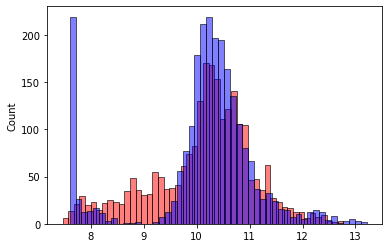

In [223]:
# Plot y_pred vs y_val to see how close the predictions was:

sns.histplot(y_pred, color='r', bins=50, alpha=0.5)
sns.histplot(y_val, color='b', bins=50, alpha=0.5)

# 2.12- Categorical Variables

#Categorical variables are non-numerical variables. eg make,model, engine_fuel_type,transmission_type,driven_wheels,vehicle_size,vehicle_style.

In [224]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [225]:
#Considering the number of doors, which is a string in the form of integer

df_train['num_of_2_doors'] = (df_train['number_of_doors'] == 2).astype('int')
df_train['num_of_3_doors'] = (df_train['number_of_doors'] == 3).astype('int')
df_train['num_of_4_doors'] = (df_train['number_of_doors'] == 4).astype('int')

In [226]:
'num_of_doors_%s' %3, 'num_of_doors_%u' % 4              # this form of string is use for replacement.

('num_of_doors_3', 'num_of_doors_4')

In [227]:
#use the above string format with for loop to get number of doors:

for v in [2,3,4]:
    df_train['num_of_doors_%s' % v] = (df_train['number_of_doors'] == v).astype('int')

In [228]:
df_train.drop(['num_of_2_doors','num_of_3_doors','num_of_4_doors'], axis=1, inplace=True)    #delete the trial code 

In [231]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df['number_of_doors'] == v).astype('int')
        features.append('num_of_doors_%s' % v)
    
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [232]:
# call the function to verify if the num_of_dorrs columns were added

prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [233]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
#w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5157995641503085

In [234]:
# no much difference between our rmse, meaning num_of_doors is not a good column. lets try make.

makers = list(df_train['make'].value_counts().head().index)
makers

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [239]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df['number_of_doors'] == v).astype('int')
        features.append('num_of_doors_%s' % v)
        
    for v in makers:
        df['maker_%s' % v] = (df['make'] == v).astype('int')
        features.append('maker_%s' % v)
    
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [241]:
# 'num_of_doors_%s' % v

In [242]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
#w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.5076038849555671

#Adding all the objects columns to our model:

In [243]:
categorical_variables = list(df_train.dtypes[df_train.dtypes == 'object'].index)

In [244]:
categorical_variables

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [245]:
# get the most common categories

categories = {}

for c in categorical_variables:
    categories[c] = list(df_train[c].value_counts().head().index)

In [246]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [247]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_of_doors_%s' % v] = (df['number_of_doors'] == v).astype('int')
        features.append('num_of_doors_%s' % v)
        
    for c,values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
    
    df_num = df[features]
    X = df_num.fillna(0).values
    
    return X

In [256]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
#w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

79.26194057225275

In [259]:
w0, w

(2.522697333563645e+16,
 array([ 2.01251368e-01,  8.11597269e+00,  8.38623149e-01, -3.15369580e+00,
         3.91764236e-03, -3.72801783e-02, -2.72702734e+02, -2.51610424e+02,
        -2.72475167e+02, -7.95006257e+00, -2.14806675e+01,  1.19936530e+01,
         1.67318623e+01, -1.25981620e+01,  2.02023966e+01, -4.81161122e+01,
        -1.86968079e+00,  1.17372141e+01, -5.56822585e+01,  5.66270202e+02,
         5.31280958e+02,  5.61606681e+02,  5.40377015e+02,  6.00416356e+02,
        -1.12606872e+16, -1.12606872e+16, -1.12606872e+16, -1.12606872e+16,
        -1.12606872e+16, -1.39662861e+16, -1.39662861e+16, -1.39662861e+16,
        -1.39662861e+16, -1.42152901e+01, -2.07376753e+00,  5.07179099e+00,
        -7.01025535e+00,  8.85948987e-02, -4.06346841e+00, -2.50550554e+01,
        -2.64082414e+01, -9.63971162e-02, -1.65377271e-02,  1.65381720e-01,
         3.31158372e-01, -2.13380372e-01]))

#the high rmse above shows that something is wrong with our model

# 2.13- Regularization

#Regularization deals with bringing down the bias weight ie controlling so it is not much.

In [250]:
# Get new array for X, make sure there is no duplicate.

X = [[4,4,4], [3,5,5], [5,1,1], [5,4,4], [7,5,5], [4,5,5]]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [252]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

#there is no inverse bcos columns 2 and 3 are the same. Adjust the X matrix
#np.linalg.inv(XTX)

In [275]:
X = [[4,4,4], [3,5,5], [5,1,1], [5,4,4], [7,5,5], [4,5,5.00000001]]
X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [276]:
y = [1,2,3,1,2,3]

In [277]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [278]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [279]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908876e-01, -3.61854400e+06,  3.61854712e+06])

#since the weights are high, to solve the problem, add small number to XTX diagonally.

In [282]:
XTX = [
    [1,2,2],
    [2,1,1.0000001],
    [2,1.0000001,1]
]
XTX = np.array(XTX)

In [283]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [284]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]
XTX = np.array(XTX)

In [285]:
np.linalg.inv(XTX)

array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
       [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
       [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

In [294]:
# you can also add number diagonally this way with identity matrix multiplied by tiny number

XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

In [295]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [298]:
XTX = XTX + 0.01 * np.eye(3)               # you could multiply with 0.1 or 1 to bring down the weights

XTX

array([[1.02     , 2.       , 2.       ],
       [2.       , 1.02     , 1.0000001],
       [2.       , 1.0000001, 1.02     ]])

In [299]:
XTX.shape

(3, 3)

In [297]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [301]:
# function of the above  solution:

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [308]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train, r=0.01)

X_val = prepare_X(df_val)
#w0, w = train_linear_regression(X_val,y_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.4516961589697941

# 2.14 Tuning the Model

#SInce regularization r affects ourmodel, we find the best value of r by using the validation set

In [319]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train,y_train, r=r)

    X_val = prepare_X(df_val)
    #w0, w = train_linear_regression(X_val, y_val,)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)
    
    print(r, w0, score)

0.0 2.522697333563645e+16 79.26194057225275
1e-05 11.385089840946154 0.45169187230051683
0.0001 6.42245049428882 0.4516919225010034
0.001 6.313666028484572 0.451692304150437
0.01 6.306640703827746 0.4516961589697941
0.1 6.2206249663546895 0.45173704531592673
1 5.659773365910085 0.45232594667821213
10 4.2945910513858685 0.4653582071675702


In [320]:
r = 0.01
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train, r=r)

X_val = prepare_X(df_val)
#w0, w = train_linear_regression(X_val, y_val,)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
score

0.4516961589697941

In [314]:
from sklearn.metrics import r2_score         # using sckit-learn to get the accuracy of our model. not for the class though.

In [318]:
r2_score(y_val, y_pred)

0.8143172255129723

# 2.15- Using the Model

#Combine both the training and validation datasets to train our model and use test dataset with rmse on the trained model

In [321]:
df_full_train = pd.concat([df_train, df_val])

In [322]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_of_doors_2,num_of_doors_3,num_of_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [324]:
# reset the combined datasets to show the actual index

df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_of_doors_2,num_of_doors_3,num_of_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [325]:
#get the full feature matrix

X_full_train = prepare_X(df_full_train)

In [326]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [329]:
# combine y dataset

y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [332]:
# use the def function of linear regression to train the combined dataset

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)

In [335]:
w0, w                      # the weights and biases after the full trained.

(6.354638537027491,
 array([ 1.62650148e-03,  1.13819989e-01, -6.76391353e-03, -6.11769581e-03,
        -5.06325742e-05, -9.81770167e-02, -8.01602006e-01, -9.46247208e-01,
        -6.08688842e-01, -4.71243141e-02,  1.81427814e-01,  7.00433448e-03,
         4.31016486e-02, -1.23075559e-01, -2.66222782e-01, -6.82242517e-01,
        -2.95842313e-01, -3.35383827e-01, -4.06118358e-01, -4.38190623e-01,
         9.22901287e-02, -2.94679355e-01, -4.96201852e-01, -4.83419196e-02,
         1.07896540e+00,  9.03824871e-01,  1.13475173e+00,  2.72352012e+00,
         5.03641526e-01,  1.61752286e+00,  1.54091411e+00,  1.61151535e+00,
         1.58007854e+00, -8.30164811e-02,  9.76676488e-02, -5.65113356e-02,
         3.16059686e-03, -3.10795856e-02,  2.18798860e+00,  2.07592027e+00,
         2.08856433e+00, -9.61686528e-02, -1.35511039e-02,  1.72216924e-01,
         3.23268836e-01, -2.05103667e-01]))

In [336]:
X_test = prepare_X(df_test)
#w0, w = train_linear_regression(X_val, y_val,)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

0.44763897331736785

In [338]:
r = 0.01
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train,y_full_train, r=r)

X_test = prepare_X(df_test)
#w0, w = train_linear_regression(X_val, y_val,)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)F
score

0.44764216844639465

#we test our model to get price of a random car. convert the data to dictionary first and input to our model

In [341]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

#make a datafram from car and input into the prepare_X function to get feature matrix

In [343]:
df_random_car = pd.DataFrame([car])
df_random_car

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [346]:
X_random_car = prepare_X(df_random_car)
X_random_car

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [350]:
# get predictions of the car

y_pred = w0 + X_random_car.dot(w)
y_pred = y_pred[0]
y_pred

10.672928293011129

In [353]:
# take the exponential to get the logarithm off

np.expm1(y_pred)

43170.174432582346

In [354]:
#compare the predicted price to actual price: note the difference in price 

np.expm1(y_test[20])

35000.00000000001